In [50]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC, SVR # С - классификация, R - регрессия
from sklearn.model_selection import train_test_split

**Задача об определение подлинности марки винной продукции**


**Формулировка:  можно ли с помощью химического состава определить, подлинное ли вино?**

Legit - подлинник,
Fraud - подделка

Существуют различные показатели кислот, остаточного сахара, хлорида, плотности и т.д.

In [29]:
df = pd.read_csv('wine_fraud.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,Legit,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,Legit,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,Legit,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,Legit,red


In [30]:
df['quality'].unique()

array(['Legit', 'Fraud'], dtype=object)

Посмотрим, сколько всего подлинников и сколько подделок

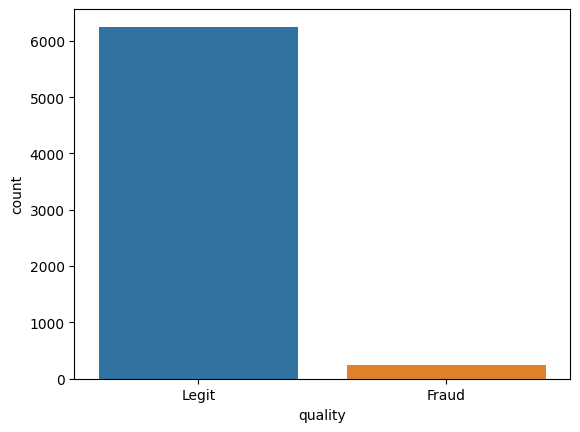

In [31]:
sns.countplot(data=df, x='quality', hue='quality');

In [32]:
df1 = df.groupby(by='quality').agg({'quality':'count'}).rename(columns={'quality':'value'})
print('Процент подделок, которые определили по внешнему виду:', round(df1.value['Fraud']/df1.value['Legit']*100,2))

Процент подделок, которые определили по внешнему виду: 3.94


Следующий график показывает соотношение подделок и подлинников в зависимости типа вина:

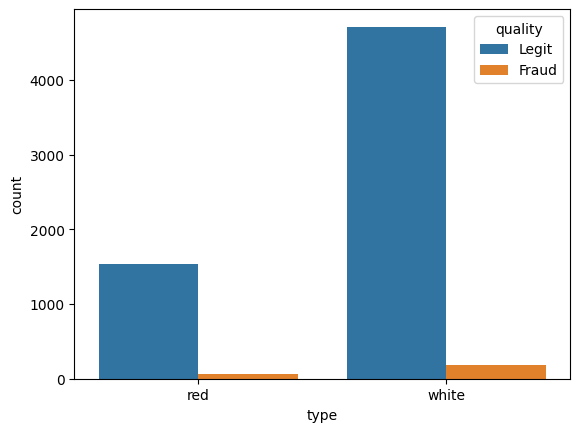

In [33]:
sns.countplot(data=df, x='type', hue='quality');

In [34]:
df2 = df.groupby(by=['type','quality']).aggregate({'quality':'count'}).rename(columns={'quality':'value'})
df2

value
type  quality       
red   Fraud       63
      Legit     1536
white Fraud      183
      Legit     4715

In [35]:
df2.values

array([[  63],
       [1536],
       [ 183],
       [4715]], dtype=int64)

Процент подделок в красном вине

In [36]:
df2.values[0]/(df2.values[1]+df2.values[0])*100

array([3.93996248])

Процент подделок в белом вине

In [37]:
df2.values[2]/(df2.values[3] + df2.values[2])*100

array([3.73621886])

Вычисляется корреляется между признаками и колонкой "quality". 

Сначала преобразуется категориальная переменная quality в целочисленный тип через одноразовое кодирование.

In [38]:
df3 = pd.get_dummies(df.drop('type', axis=1), dtype=int, drop_first=False)

In [39]:
df3.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality_Fraud,quality_Legit
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,0,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,0,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,0,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,0,1


<Axes: >

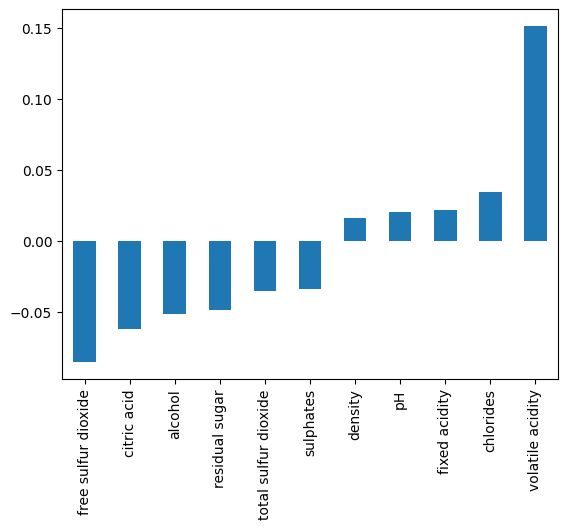

In [40]:
df3.corr()['quality_Fraud'][:-2].sort_values().plot(kind='bar')

**ЗАДАНИЕ: Нарисуйте график clustermap с помощью seaborn, чтобы исследовать связи между переменными.**

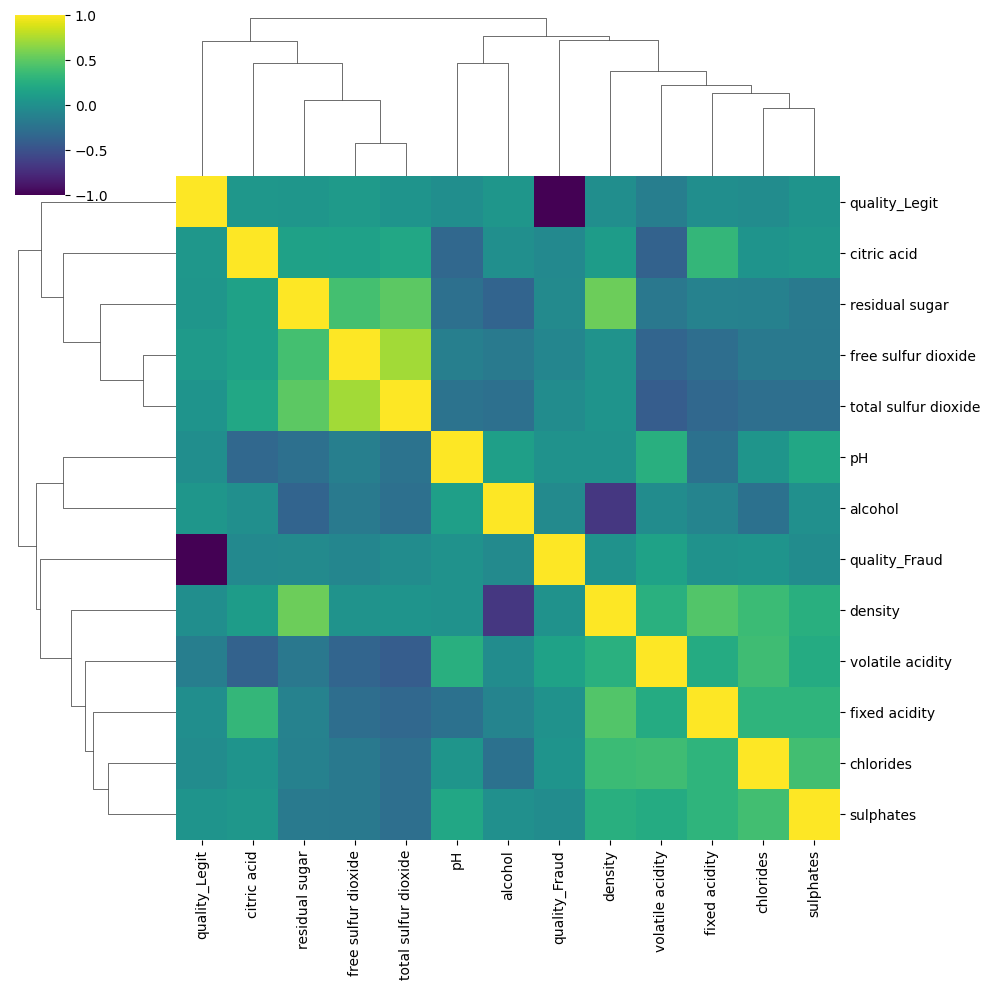

In [61]:
sns.clustermap(data=df3.corr(), cmap='viridis')

----
## Модель машинного обучения

Сконвертируем на исходном дата сете категориальную колонку "type" из текстовых значений "red" и "white" в dummy-переменные:**

In [47]:
df['quality'] = pd.get_dummies(data=df['quality'], drop_first=True, dtype=int)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,red
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,white
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,white
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,white
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,white


In [48]:
df['type'] = pd.get_dummies(data=df['type'], dtype=int, drop_first=True)
df

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,1,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,1,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,1,0
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,1,1
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,1,1
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,1,1
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,1,1


In [49]:
X = df.drop('quality', axis=1)
y = df['quality']

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=101)

In [62]:
from sklearn.preprocessing import StandardScaler

In [63]:
scaler = StandardScaler()
scaled_X_train = scaler.fit_transform(X_train)
scaled_X_test = scaler.transform(X_test)

In [64]:
from sklearn.svm import SVC

In [65]:
svc = SVC(class_weight='balanced')

In [66]:
from sklearn.model_selection import GridSearchCV

In [67]:
param_grid = {'C':[0.001,0.01,0.1,0.5,1],'gamma':['scale','auto']}
grid = GridSearchCV(svc,param_grid)

In [68]:
grid.fit(scaled_X_train,y_train)

GridSearchCV(estimator=SVC(class_weight='balanced'),
             param_grid={'C': [0.001, 0.01, 0.1, 0.5, 1],
                         'gamma': ['scale', 'auto']})

In [69]:
grid.best_params_

{'C': 1, 'gamma': 'auto'}